#Coffee Shop Business Analysis

##Load the Data

In [0]:
df = spark.read.csv("/FileStore/tables/coffee_Full.csv", inferSchema = True, header = True)

##Exploratory Data Analysis

###Data Overview

In [0]:
display(df)

_c0 transaction_id age income sex rewards_member occupation num_items purchase_method wait_time purchase_amount store_location transaction_time day_of_week 1 1 48 $50K-$75K Female false Retired 3 Credit Card 4.37041779796359 15.19 Uptown 22 Saturday 2 2 32 $25K-$50K Female false Retired 3 Cash 2.30796121678142 12.41 Midtown 20 Friday 3 3 68 $75K-$100K Female false Self Employed 4 Mobile Payment 3.89939822873409 18.16 Midtown 12 Friday 4 4 31 $25K-$50K Female false Employed 4 Mobile Payment 1.87190761759261 15.41 Downtown 14 Sunday 5 5 20 Under $25K Female false Student 1 Credit Card 2.66648236799237 6.23 Uptown 18 Wednesday 6 6 59 $75K-$100K Female true Employed 5 Credit Card 2.50637046034456 21.72 Midtown 13 Monday 7 7 67 $75K-$100K Male true Self Employed 3 Credit Card 0.966888079743862 13.08 Uptown 12 Saturday 8 8 71 Over $100K Female false Retired 3 Credit Card 3.42676111896725 14.96 Downtown 13 Saturday 9 9 60 $75K-$100K Male true Retired 6 Credit Card 2.94511204259134 19.27 Downtown 11 Wednesday 10 10 54 $75K-$100K Male true Employed 3 Credit Card 0.853794802025569 13.38 Midtown 16 Friday 11 11 69 $75K-$100K Female false Retired 1 Credit Card 1.84201939727228 7.77 Midtown 20 Thursday 12 12 31 $25K-$50K Male false Employed 2 Credit Card 2.83113616743937 9.4 Downtown 17 Monday 13 13 71 Over $100K Male true Self Employed 7 Credit Card 2.32169891835435 30.33 Downtown 12 Friday 14 14 42 $50K-$75K Male false Employed 5 Credit Card 5.3640250495533 20.03 Downtown 14 Monday 15 15 43 $50K-$75K Female false Self Employed 1 Credit Card 3.01170260829887 9.19 Uptown 22 Monday 16 16 44 $50K-$75K Male false Retired 2 Credit Card 4.84513397047885 13.3 Downtown 8 Tuesday 17 17 22 $25K-$50K Female false Student 3 Credit Card 4.62054880196501 21.54 Downtown 10 Monday 18 18 68 $75K-$100K Female false Retired 5 Credit Card 4.74261880785731 22.83 Uptown 8 Thursday 19 19 44 $50K-$75K Female false Employed 4 Credit Card 3.29372136956535 18.84 Downtown 17 Friday 20 20 74 Over $100K Male false Self Employed 5 Credit Card 2.77240479186736 22.61 Downtown 8 Friday 21 21 45 $50K-$75K Female false Retired 2 Credit Card 4.69463475082443 18.01 Downtown 6 Tuesday 22 22 74 Over $100K Female false Retired 4 Mobile Payment 6.15106904848735 15.99 Downtown 8 Sunday 23 23 26 $25K-$50K Female false Employed 2 Cash 6.33840504867014 22.62 Midtown 19 Saturday 24 24 46 $50K-$75K Female false Employed 3 Credit Card 5.17515369794507 18.02 Uptown 8 Thursday 25 25 52 $50K-$75K Female false Employed 3 Credit Card 5.38652417133762 13.63 Downtown 7 Thursday 26 26 25 $25K-$50K Male false Employed 1 Credit Card 5.4180536035003 7.24 Downtown 11 Friday 27 27 43 $50K-$75K Female true Self Employed 4 Credit Card 1.66157707924053 18.69 Downtown 19 Monday 28 28 24 $25K-$50K Male false Employed 2 Mobile Payment 3.85947247246503 17.59 Downtown 9 Monday 29 29 59 $75K-$100K Female false Self Employed 1 Credit Card 5.2658759429863 9.18 Uptown 18 Friday 30 30 26 $25K-$50K Female true Employed 3 Credit Card 0.895759219737766 20.14 Midtown 21 Saturday 31 31 79 Over $100K Male true Employed 4 Credit Card 1.70963406663821 17.28 Downtown 16 Wednesday 32 32 36 $25K-$50K Female false Employed 3 Credit Card 3.23468531239395 18.41 Uptown 15 Monday 33 33 53 $50K-$75K Female true Self Employed 6 Credit Card 0.475965322635555 26.5 Midtown 16 Tuesday 34 34 31 $25K-$50K Female false Employed 1 Credit Card 2.44373690362319 7.2 Midtown 19 Tuesday 35 35 34 $25K-$50K Female false Self Employed 3 Credit Card 4.27313828105725 17.26 Uptown 12 Friday 36 36 60 $75K-$100K Female false Employed 4 Credit Card 2.6906275908758 17.45 Downtown 19 Friday 37 37 56 $75K-$100K Male false Employed 4 Credit Card 1.21350564075743 20.56 Uptown 19 Tuesday 38 38 70 Over $100K Male false Self Employed 4 Credit Card 5.24963338886363 14.64 Midtown 12 Wednesday 39 39 29 $25K-$50K Male false Self Employed 2 Credit Card 3.68571205588007 6.19 Uptown 7 Sunday 40 40 32 $25K-$50K Male false Employed 6 Cash 4.44252129564492 30.65 Uptown

In [0]:
df.printSchema()

root
 |-- _c0: integer (nullable = true)
 |-- transaction_id: integer (nullable = true)
 |-- age: integer (nullable = true)
 |-- income: string (nullable = true)
 |-- sex: string (nullable = true)
 |-- rewards_member: boolean (nullable = true)
 |-- occupation: string (nullable = true)
 |-- num_items: integer (nullable = true)
 |-- purchase_method: string (nullable = true)
 |-- wait_time: double (nullable = true)
 |-- purchase_amount: double (nullable = true)
 |-- store_location: string (nullable = true)
 |-- transaction_time: integer (nullable = true)
 |-- day_of_week: string (nullable = true)



In [0]:
#1805204 rows in the data
df.count()

Out[156]: 1805204

In [0]:
#Drop the unnesscary columns
df = df.drop("_c0", "transaction_id")

###Distribution of Features

In [0]:
#Distribution of income
display(df.groupBy('income').count())

income count $25K-$50K 472408 $75K-$100K 472925 $50K-$75K 486561 Under $25K 72375 Over $100K 300935

Output can only be rendered in Databricks

In [0]:
#Distribution of purchase_method
display(df.groupBy('purchase_method').count())

purchase_method count Mobile Payment 360817 Credit Card 1132319 Cash 312068

Output can only be rendered in Databricks

In [0]:
#Distribution of gender
display(df.groupBy('sex').count())

sex count Female 1118857 Male 686347

Output can only be rendered in Databricks

In [0]:
#Distribution of rewards_member
display(df.groupBy('rewards_member').count())

rewards_member count true 602537 false 1202667

Output can only be rendered in Databricks

In [0]:
#Distribution of occupation
display(df.groupBy('occupation').count())

occupation count Employed 816409 Self Employed 401397 Student 166384 Retired 421014

Output can only be rendered in Databricks

In [0]:
#Distribution of store_location
display(df.groupBy('store_location').count())

store_location count Midtown 542269 Uptown 542242 Downtown 720693

Output can only be rendered in Databricks

In [0]:
#Distribution of 'day_of_week'
display(df.groupBy('day_of_week').count())

day_of_week count Wednesday 270966 Tuesday 271177 Friday 361261 Thursday 270319 Saturday 180543 Monday 379059 Sunday 71879

Output can only be rendered in Databricks

In [0]:
#Distribution of 'transaction_time'
display(df.groupBy('transaction_time').count())

transaction_time count 12 100018 22 100582 13 100337 16 100415 6 100259 20 100726 19 99996 15 100425 17 100415 9 100061 8 100121 23 100170 7 99834 10 100550 21 100312 11 100223 14 100742 18 100018

###Correlation Matrix

In [0]:
from pyspark.ml.feature import VectorAssembler
# Replace 'continuous_columns' with the list of your continuous feature column names
continuous_columns = ['age', 'num_items', 'wait_time', 'purchase_amount', 'transaction_time']
continuous_assembler = VectorAssembler(inputCols=continuous_columns, outputCol="continuous_features")
continuous_output = continuous_assembler.transform(df)

In [0]:
from pyspark.ml.stat import Correlation
continuous_correlation_matrix = Correlation.corr(continuous_output, "continuous_features").head()[0]
print(continuous_correlation_matrix)

DenseMatrix([[ 1.00000000e+00,  9.82791671e-02, -9.14008316e-02,
              -1.18523085e-01,  1.36948458e-04],
             [ 9.82791671e-02,  1.00000000e+00, -3.36723875e-01,
               8.47271271e-01,  3.48151054e-04],
             [-9.14008316e-02, -3.36723875e-01,  1.00000000e+00,
              -2.81716401e-01, -1.82983181e-01],
             [-1.18523085e-01,  8.47271271e-01, -2.81716401e-01,
               1.00000000e+00,  6.66074347e-04],
             [ 1.36948458e-04,  3.48151054e-04, -1.82983181e-01,
               6.66074347e-04,  1.00000000e+00]])


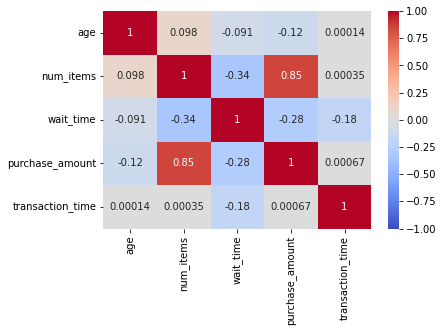

In [0]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Replace 'continuous_columns' with the list of your continuous feature column names
continuous_columns = ['age', 'num_items', 'wait_time', 'purchase_amount', 'transaction_time']

# Convert the correlation matrix to a Pandas DataFrame
continuous_corr_matrix_df = pd.DataFrame(continuous_correlation_matrix.toArray(), columns=continuous_columns, index=continuous_columns)

# Create the heatmap using Seaborn
sns.heatmap(continuous_corr_matrix_df, annot=True, cmap='coolwarm', vmin=-1, vmax=1)

# Show the plot
plt.show()


In [0]:
#Plot of features
display(df)

age income sex rewards_member occupation num_items purchase_method wait_time purchase_amount store_location transaction_time day_of_week 48 $50K-$75K Female false Retired 3 Credit Card 4.37041779796359 15.19 Uptown 22 Saturday 32 $25K-$50K Female false Retired 3 Cash 2.30796121678142 12.41 Midtown 20 Friday 68 $75K-$100K Female false Self Employed 4 Mobile Payment 3.89939822873409 18.16 Midtown 12 Friday 31 $25K-$50K Female false Employed 4 Mobile Payment 1.87190761759261 15.41 Downtown 14 Sunday 20 Under $25K Female false Student 1 Credit Card 2.66648236799237 6.23 Uptown 18 Wednesday 59 $75K-$100K Female true Employed 5 Credit Card 2.50637046034456 21.72 Midtown 13 Monday 67 $75K-$100K Male true Self Employed 3 Credit Card 0.966888079743862 13.08 Uptown 12 Saturday 71 Over $100K Female false Retired 3 Credit Card 3.42676111896725 14.96 Downtown 13 Saturday 60 $75K-$100K Male true Retired 6 Credit Card 2.94511204259134 19.27 Downtown 11 Wednesday 54 $75K-$100K Male true Employed 3 Credit Card 0.853794802025569 13.38 Midtown 16 Friday 69 $75K-$100K Female false Retired 1 Credit Card 1.84201939727228 7.77 Midtown 20 Thursday 31 $25K-$50K Male false Employed 2 Credit Card 2.83113616743937 9.4 Downtown 17 Monday 71 Over $100K Male true Self Employed 7 Credit Card 2.32169891835435 30.33 Downtown 12 Friday 42 $50K-$75K Male false Employed 5 Credit Card 5.3640250495533 20.03 Downtown 14 Monday 43 $50K-$75K Female false Self Employed 1 Credit Card 3.01170260829887 9.19 Uptown 22 Monday 44 $50K-$75K Male false Retired 2 Credit Card 4.84513397047885 13.3 Downtown 8 Tuesday 22 $25K-$50K Female false Student 3 Credit Card 4.62054880196501 21.54 Downtown 10 Monday 68 $75K-$100K Female false Retired 5 Credit Card 4.74261880785731 22.83 Uptown 8 Thursday 44 $50K-$75K Female false Employed 4 Credit Card 3.29372136956535 18.84 Downtown 17 Friday 74 Over $100K Male false Self Employed 5 Credit Card 2.77240479186736 22.61 Downtown 8 Friday 45 $50K-$75K Female false Retired 2 Credit Card 4.69463475082443 18.01 Downtown 6 Tuesday 74 Over $100K Female false Retired 4 Mobile Payment 6.15106904848735 15.99 Downtown 8 Sunday 26 $25K-$50K Female false Employed 2 Cash 6.33840504867014 22.62 Midtown 19 Saturday 46 $50K-$75K Female false Employed 3 Credit Card 5.17515369794507 18.02 Uptown 8 Thursday 52 $50K-$75K Female false Employed 3 Credit Card 5.38652417133762 13.63 Downtown 7 Thursday 25 $25K-$50K Male false Employed 1 Credit Card 5.4180536035003 7.24 Downtown 11 Friday 43 $50K-$75K Female true Self Employed 4 Credit Card 1.66157707924053 18.69 Downtown 19 Monday 24 $25K-$50K Male false Employed 2 Mobile Payment 3.85947247246503 17.59 Downtown 9 Monday 59 $75K-$100K Female false Self Employed 1 Credit Card 5.2658759429863 9.18 Uptown 18 Friday 26 $25K-$50K Female true Employed 3 Credit Card 0.895759219737766 20.14 Midtown 21 Saturday 79 Over $100K Male true Employed 4 Credit Card 1.70963406663821 17.28 Downtown 16 Wednesday 36 $25K-$50K Female false Employed 3 Credit Card 3.23468531239395 18.41 Uptown 15 Monday 53 $50K-$75K Female true Self Employed 6 Credit Card 0.475965322635555 26.5 Midtown 16 Tuesday 31 $25K-$50K Female false Employed 1 Credit Card 2.44373690362319 7.2 Midtown 19 Tuesday 34 $25K-$50K Female false Self Employed 3 Credit Card 4.27313828105725 17.26 Uptown 12 Friday 60 $75K-$100K Female false Employed 4 Credit Card 2.6906275908758 17.45 Downtown 19 Friday 56 $75K-$100K Male false Employed 4 Credit Card 1.21350564075743 20.56 Uptown 19 Tuesday 70 Over $100K Male false Self Employed 4 Credit Card 5.24963338886363 14.64 Midtown 12 Wednesday 29 $25K-$50K Male false Self Employed 2 Credit Card 3.68571205588007 6.19 Uptown 7 Sunday 32 $25K-$50K Male false Employed 6 Cash 4.44252129564492 30.65 Uptown 22 Tuesday 49 $50K-$75K Female false Employed 6 Cash 3.48614523464 22.81 Downtown 7 Thursday 59 $75K-$100K Male true Employed 4 Mobile Payment 3.16776094907521 15.0 Downtown 9 Wednesday 62 $75K-$100K Male true Retired 5 Credit Card 0.906597

Output can only be rendered in Databricks

Output can only be rendered in Databricks

Output can only be rendered in Databricks

Output can only be rendered in Databricks

In [0]:
display(df)

age income sex rewards_member occupation num_items purchase_method wait_time purchase_amount store_location transaction_time day_of_week daytype RewardsIndex 48 $50K-$75K Female false Retired 3 Credit Card 4.37041779796359 15.19 Uptown 22 Saturday Weekend 0 32 $25K-$50K Female false Retired 3 Cash 2.30796121678142 12.41 Midtown 20 Friday Weekday 0 68 $75K-$100K Female false Self Employed 4 Mobile Payment 3.89939822873409 18.16 Midtown 12 Friday Weekday 0 31 $25K-$50K Female false Employed 4 Mobile Payment 1.87190761759261 15.41 Downtown 14 Sunday Weekend 0 20 Under $25K Female false Student 1 Credit Card 2.66648236799237 6.23 Uptown 18 Wednesday Weekday 0 59 $75K-$100K Female true Employed 5 Credit Card 2.50637046034456 21.72 Midtown 13 Monday Weekday 1 67 $75K-$100K Male true Self Employed 3 Credit Card 0.966888079743862 13.08 Uptown 12 Saturday Weekend 1 71 Over $100K Female false Retired 3 Credit Card 3.42676111896725 14.96 Downtown 13 Saturday Weekend 0 60 $75K-$100K Male true Retired 6 Credit Card 2.94511204259134 19.27 Downtown 11 Wednesday Weekday 1 54 $75K-$100K Male true Employed 3 Credit Card 0.853794802025569 13.38 Midtown 16 Friday Weekday 1 69 $75K-$100K Female false Retired 1 Credit Card 1.84201939727228 7.77 Midtown 20 Thursday Weekday 0 31 $25K-$50K Male false Employed 2 Credit Card 2.83113616743937 9.4 Downtown 17 Monday Weekday 0 71 Over $100K Male true Self Employed 7 Credit Card 2.32169891835435 30.33 Downtown 12 Friday Weekday 1 42 $50K-$75K Male false Employed 5 Credit Card 5.3640250495533 20.03 Downtown 14 Monday Weekday 0 43 $50K-$75K Female false Self Employed 1 Credit Card 3.01170260829887 9.19 Uptown 22 Monday Weekday 0 44 $50K-$75K Male false Retired 2 Credit Card 4.84513397047885 13.3 Downtown 8 Tuesday Weekday 0 22 $25K-$50K Female false Student 3 Credit Card 4.62054880196501 21.54 Downtown 10 Monday Weekday 0 68 $75K-$100K Female false Retired 5 Credit Card 4.74261880785731 22.83 Uptown 8 Thursday Weekday 0 44 $50K-$75K Female false Employed 4 Credit Card 3.29372136956535 18.84 Downtown 17 Friday Weekday 0 74 Over $100K Male false Self Employed 5 Credit Card 2.77240479186736 22.61 Downtown 8 Friday Weekday 0 45 $50K-$75K Female false Retired 2 Credit Card 4.69463475082443 18.01 Downtown 6 Tuesday Weekday 0 74 Over $100K Female false Retired 4 Mobile Payment 6.15106904848735 15.99 Downtown 8 Sunday Weekend 0 26 $25K-$50K Female false Employed 2 Cash 6.33840504867014 22.62 Midtown 19 Saturday Weekend 0 46 $50K-$75K Female false Employed 3 Credit Card 5.17515369794507 18.02 Uptown 8 Thursday Weekday 0 52 $50K-$75K Female false Employed 3 Credit Card 5.38652417133762 13.63 Downtown 7 Thursday Weekday 0 25 $25K-$50K Male false Employed 1 Credit Card 5.4180536035003 7.24 Downtown 11 Friday Weekday 0 43 $50K-$75K Female true Self Employed 4 Credit Card 1.66157707924053 18.69 Downtown 19 Monday Weekday 1 24 $25K-$50K Male false Employed 2 Mobile Payment 3.85947247246503 17.59 Downtown 9 Monday Weekday 0 59 $75K-$100K Female false Self Employed 1 Credit Card 5.2658759429863 9.18 Uptown 18 Friday Weekday 0 26 $25K-$50K Female true Employed 3 Credit Card 0.895759219737766 20.14 Midtown 21 Saturday Weekend 1 79 Over $100K Male true Employed 4 Credit Card 1.70963406663821 17.28 Downtown 16 Wednesday Weekday 1 36 $25K-$50K Female false Employed 3 Credit Card 3.23468531239395 18.41 Uptown 15 Monday Weekday 0 53 $50K-$75K Female true Self Employed 6 Credit Card 0.475965322635555 26.5 Midtown 16 Tuesday Weekday 1 31 $25K-$50K Female false Employed 1 Credit Card 2.44373690362319 7.2 Midtown 19 Tuesday Weekday 0 34 $25K-$50K Female false Self Employed 3 Credit Card 4.27313828105725 17.26 Uptown 12 Friday Weekday 0 60 $75K-$100K Female false Employed 4 Credit Card 2.6906275908758 17.45 Downtown 19 Friday Weekday 0 56 $75K-$100K Male false Employed 4 Credit Card 1.21350564075743 20.56 Uptown 19 Tuesday Weekday 0 70 Over $100K Male false Self Employed 4 Credit Card 5.24963338886363 14.64 Midtown 12 Wednesday Weekday 0

Output can only be rendered in Databricks

Output can only be rendered in Databricks

###Feature Engineering

The dataset has 7 categorical features: 

    income
    
    sex
    
    rewards_member
    
    occupation
    
    puchase_method
    
    store_location
    
    day_of_week

In [0]:
from pyspark.ml.feature import *

In [0]:
from pyspark.sql.functions import col, when
day_type_expression = (
    when(col("day_of_week").isin(["Saturday", "Sunday"]), "Weekend")
    .otherwise("Weekday")
)

df = df.withColumn("daytype", day_type_expression)

In [0]:
display(df)

age income sex rewards_member occupation num_items purchase_method wait_time purchase_amount store_location transaction_time day_of_week daytype 48 $50K-$75K Female false Retired 3 Credit Card 4.37041779796359 15.19 Uptown 22 Saturday Weekend 32 $25K-$50K Female false Retired 3 Cash 2.30796121678142 12.41 Midtown 20 Friday Weekday 68 $75K-$100K Female false Self Employed 4 Mobile Payment 3.89939822873409 18.16 Midtown 12 Friday Weekday 31 $25K-$50K Female false Employed 4 Mobile Payment 1.87190761759261 15.41 Downtown 14 Sunday Weekend 20 Under $25K Female false Student 1 Credit Card 2.66648236799237 6.23 Uptown 18 Wednesday Weekday 59 $75K-$100K Female true Employed 5 Credit Card 2.50637046034456 21.72 Midtown 13 Monday Weekday 67 $75K-$100K Male true Self Employed 3 Credit Card 0.966888079743862 13.08 Uptown 12 Saturday Weekend 71 Over $100K Female false Retired 3 Credit Card 3.42676111896725 14.96 Downtown 13 Saturday Weekend 60 $75K-$100K Male true Retired 6 Credit Card 2.94511204259134 19.27 Downtown 11 Wednesday Weekday 54 $75K-$100K Male true Employed 3 Credit Card 0.853794802025569 13.38 Midtown 16 Friday Weekday 69 $75K-$100K Female false Retired 1 Credit Card 1.84201939727228 7.77 Midtown 20 Thursday Weekday 31 $25K-$50K Male false Employed 2 Credit Card 2.83113616743937 9.4 Downtown 17 Monday Weekday 71 Over $100K Male true Self Employed 7 Credit Card 2.32169891835435 30.33 Downtown 12 Friday Weekday 42 $50K-$75K Male false Employed 5 Credit Card 5.3640250495533 20.03 Downtown 14 Monday Weekday 43 $50K-$75K Female false Self Employed 1 Credit Card 3.01170260829887 9.19 Uptown 22 Monday Weekday 44 $50K-$75K Male false Retired 2 Credit Card 4.84513397047885 13.3 Downtown 8 Tuesday Weekday 22 $25K-$50K Female false Student 3 Credit Card 4.62054880196501 21.54 Downtown 10 Monday Weekday 68 $75K-$100K Female false Retired 5 Credit Card 4.74261880785731 22.83 Uptown 8 Thursday Weekday 44 $50K-$75K Female false Employed 4 Credit Card 3.29372136956535 18.84 Downtown 17 Friday Weekday 74 Over $100K Male false Self Employed 5 Credit Card 2.77240479186736 22.61 Downtown 8 Friday Weekday 45 $50K-$75K Female false Retired 2 Credit Card 4.69463475082443 18.01 Downtown 6 Tuesday Weekday 74 Over $100K Female false Retired 4 Mobile Payment 6.15106904848735 15.99 Downtown 8 Sunday Weekend 26 $25K-$50K Female false Employed 2 Cash 6.33840504867014 22.62 Midtown 19 Saturday Weekend 46 $50K-$75K Female false Employed 3 Credit Card 5.17515369794507 18.02 Uptown 8 Thursday Weekday 52 $50K-$75K Female false Employed 3 Credit Card 5.38652417133762 13.63 Downtown 7 Thursday Weekday 25 $25K-$50K Male false Employed 1 Credit Card 5.4180536035003 7.24 Downtown 11 Friday Weekday 43 $50K-$75K Female true Self Employed 4 Credit Card 1.66157707924053 18.69 Downtown 19 Monday Weekday 24 $25K-$50K Male false Employed 2 Mobile Payment 3.85947247246503 17.59 Downtown 9 Monday Weekday 59 $75K-$100K Female false Self Employed 1 Credit Card 5.2658759429863 9.18 Uptown 18 Friday Weekday 26 $25K-$50K Female true Employed 3 Credit Card 0.895759219737766 20.14 Midtown 21 Saturday Weekend 79 Over $100K Male true Employed 4 Credit Card 1.70963406663821 17.28 Downtown 16 Wednesday Weekday 36 $25K-$50K Female false Employed 3 Credit Card 3.23468531239395 18.41 Uptown 15 Monday Weekday 53 $50K-$75K Female true Self Employed 6 Credit Card 0.475965322635555 26.5 Midtown 16 Tuesday Weekday 31 $25K-$50K Female false Employed 1 Credit Card 2.44373690362319 7.2 Midtown 19 Tuesday Weekday 34 $25K-$50K Female false Self Employed 3 Credit Card 4.27313828105725 17.26 Uptown 12 Friday Weekday 60 $75K-$100K Female false Employed 4 Credit Card 2.6906275908758 17.45 Downtown 19 Friday Weekday 56 $75K-$100K Male false Employed 4 Credit Card 1.21350564075743 20.56 Uptown 19 Tuesday Weekday 70 Over $100K Male false Self Employed 4 Credit Card 5.24963338886363 14.64 Midtown 12 Wednesday Weekday 29 $25K-$50K Male false Self Employed 2 Credit Card 3.68571205588007 6.19 Uptown 7 Sunda

In [0]:
from pyspark.ml.feature import *
income_indexer = StringIndexer(inputCol='income', outputCol="IncomeIndex")
income_encoder = OneHotEncoder(inputCol="IncomeIndex", outputCol="IncomeVector")

gender_indexer = StringIndexer(inputCol = "sex", outputCol = "SexIndex")
gender_encoder = OneHotEncoder(inputCol = "SexIndex", outputCol = "SexVector")

occupation_indexer = StringIndexer(inputCol = "occupation", outputCol = "OccupationIndex")
occupation_encoder = OneHotEncoder(inputCol = "OccupationIndex", outputCol = "OccupationVector")

purchase_method_indexer = StringIndexer(inputCol = "purchase_method", outputCol = "PurchaseIndex")
purchase_method_encoder = OneHotEncoder(inputCol = "PurchaseIndex", outputCol = "PurchaseVector")

location_indexer = StringIndexer(inputCol = "store_location", outputCol = "LocationIndex")
location_encoder = OneHotEncoder(inputCol = "LocationIndex", outputCol = "LocationVector")

day_type_indexer = StringIndexer(inputCol="daytype", outputCol="DayTypeIndex")
day_type_encoder = OneHotEncoder(inputCol = "DayTypeIndex", outputCol = "DayTypeVector")

In [0]:
from pyspark.sql.types import IntegerType
df = df.withColumn("RewardsIndex", col("rewards_member").cast(IntegerType()))
rewards_member_indexer = StringIndexer(inputCol = "rewards_member", outputCol = "RewardsIndex")

In [0]:
display(df)

age income sex rewards_member occupation num_items purchase_method wait_time purchase_amount store_location transaction_time day_of_week daytype RewardsIndex 48 $50K-$75K Female false Retired 3 Credit Card 4.37041779796359 15.19 Uptown 22 Saturday Weekend 0 32 $25K-$50K Female false Retired 3 Cash 2.30796121678142 12.41 Midtown 20 Friday Weekday 0 68 $75K-$100K Female false Self Employed 4 Mobile Payment 3.89939822873409 18.16 Midtown 12 Friday Weekday 0 31 $25K-$50K Female false Employed 4 Mobile Payment 1.87190761759261 15.41 Downtown 14 Sunday Weekend 0 20 Under $25K Female false Student 1 Credit Card 2.66648236799237 6.23 Uptown 18 Wednesday Weekday 0 59 $75K-$100K Female true Employed 5 Credit Card 2.50637046034456 21.72 Midtown 13 Monday Weekday 1 67 $75K-$100K Male true Self Employed 3 Credit Card 0.966888079743862 13.08 Uptown 12 Saturday Weekend 1 71 Over $100K Female false Retired 3 Credit Card 3.42676111896725 14.96 Downtown 13 Saturday Weekend 0 60 $75K-$100K Male true Retired 6 Credit Card 2.94511204259134 19.27 Downtown 11 Wednesday Weekday 1 54 $75K-$100K Male true Employed 3 Credit Card 0.853794802025569 13.38 Midtown 16 Friday Weekday 1 69 $75K-$100K Female false Retired 1 Credit Card 1.84201939727228 7.77 Midtown 20 Thursday Weekday 0 31 $25K-$50K Male false Employed 2 Credit Card 2.83113616743937 9.4 Downtown 17 Monday Weekday 0 71 Over $100K Male true Self Employed 7 Credit Card 2.32169891835435 30.33 Downtown 12 Friday Weekday 1 42 $50K-$75K Male false Employed 5 Credit Card 5.3640250495533 20.03 Downtown 14 Monday Weekday 0 43 $50K-$75K Female false Self Employed 1 Credit Card 3.01170260829887 9.19 Uptown 22 Monday Weekday 0 44 $50K-$75K Male false Retired 2 Credit Card 4.84513397047885 13.3 Downtown 8 Tuesday Weekday 0 22 $25K-$50K Female false Student 3 Credit Card 4.62054880196501 21.54 Downtown 10 Monday Weekday 0 68 $75K-$100K Female false Retired 5 Credit Card 4.74261880785731 22.83 Uptown 8 Thursday Weekday 0 44 $50K-$75K Female false Employed 4 Credit Card 3.29372136956535 18.84 Downtown 17 Friday Weekday 0 74 Over $100K Male false Self Employed 5 Credit Card 2.77240479186736 22.61 Downtown 8 Friday Weekday 0 45 $50K-$75K Female false Retired 2 Credit Card 4.69463475082443 18.01 Downtown 6 Tuesday Weekday 0 74 Over $100K Female false Retired 4 Mobile Payment 6.15106904848735 15.99 Downtown 8 Sunday Weekend 0 26 $25K-$50K Female false Employed 2 Cash 6.33840504867014 22.62 Midtown 19 Saturday Weekend 0 46 $50K-$75K Female false Employed 3 Credit Card 5.17515369794507 18.02 Uptown 8 Thursday Weekday 0 52 $50K-$75K Female false Employed 3 Credit Card 5.38652417133762 13.63 Downtown 7 Thursday Weekday 0 25 $25K-$50K Male false Employed 1 Credit Card 5.4180536035003 7.24 Downtown 11 Friday Weekday 0 43 $50K-$75K Female true Self Employed 4 Credit Card 1.66157707924053 18.69 Downtown 19 Monday Weekday 1 24 $25K-$50K Male false Employed 2 Mobile Payment 3.85947247246503 17.59 Downtown 9 Monday Weekday 0 59 $75K-$100K Female false Self Employed 1 Credit Card 5.2658759429863 9.18 Uptown 18 Friday Weekday 0 26 $25K-$50K Female true Employed 3 Credit Card 0.895759219737766 20.14 Midtown 21 Saturday Weekend 1 79 Over $100K Male true Employed 4 Credit Card 1.70963406663821 17.28 Downtown 16 Wednesday Weekday 1 36 $25K-$50K Female false Employed 3 Credit Card 3.23468531239395 18.41 Uptown 15 Monday Weekday 0 53 $50K-$75K Female true Self Employed 6 Credit Card 0.475965322635555 26.5 Midtown 16 Tuesday Weekday 1 31 $25K-$50K Female false Employed 1 Credit Card 2.44373690362319 7.2 Midtown 19 Tuesday Weekday 0 34 $25K-$50K Female false Self Employed 3 Credit Card 4.27313828105725 17.26 Uptown 12 Friday Weekday 0 60 $75K-$100K Female false Employed 4 Credit Card 2.6906275908758 17.45 Downtown 19 Friday Weekday 0 56 $75K-$100K Male false Employed 4 Credit Card 1.21350564075743 20.56 Uptown 19 Tuesday Weekday 0 70 Over $100K Male false Self Employed 4 Credit Card 5.24963338886363 14.64 Midtown 12 Wednesday Weekday 0

##Modeling - Target "Purchase_Amount"

###Pipeline

In [0]:
from pyspark.ml import Pipeline

assembler = VectorAssembler(inputCols = ['age', 
                                         'IncomeVector', 
                                         'SexVector', 
                                         'rewards_member',
                                         "OccupationVector",
                                         'PurchaseVector',
                                         'wait_time',
                                         'LocationVector',
                                         'transaction_time',
                                         'DayTypeVector'], outputCol = 'features')

pipeline = Pipeline(stages = [income_indexer, income_encoder, 
                              gender_indexer, gender_encoder,
                              occupation_indexer, occupation_encoder, 
                              purchase_method_indexer, purchase_method_encoder,
                              location_indexer, location_encoder,
                              day_type_indexer, day_type_encoder,
                              assembler])

In [0]:
output = pipeline.fit(df).transform(df)

In [0]:
display(output)

age income sex rewards_member occupation num_items purchase_method wait_time purchase_amount store_location transaction_time day_of_week daytype RewardsIndex IncomeIndex IncomeVector SexIndex SexVector OccupationIndex OccupationVector PurchaseIndex PurchaseVector LocationIndex LocationVector DayTypeIndex DayTypeVector features 48 $50K-$75K Female false Retired 3 Credit Card 4.37041779796359 15.19 Uptown 22 Saturday Weekend 0 0.0 Map(vectorType -> sparse, length -> 4, indices -> List(0), values -> List(1.0)) 0.0 Map(vectorType -> sparse, length -> 1, indices -> List(0), values -> List(1.0)) 1.0 Map(vectorType -> sparse, length -> 3, indices -> List(1), values -> List(1.0)) 0.0 Map(vectorType -> sparse, length -> 2, indices -> List(0), values -> List(1.0)) 2.0 Map(vectorType -> sparse, length -> 2, indices -> List(), values -> List()) 1.0 Map(vectorType -> sparse, length -> 1, indices -> List(), values -> List()) Map(vectorType -> sparse, length -> 17, indices -> List(0, 1, 5, 8, 10, 12, 15), values -> List(48.0, 1.0, 1.0, 1.0, 1.0, 4.37041779796359, 22.0)) 32 $25K-$50K Female false Retired 3 Cash 2.30796121678142 12.41 Midtown 20 Friday Weekday 0 2.0 Map(vectorType -> sparse, length -> 4, indices -> List(2), values -> List(1.0)) 0.0 Map(vectorType -> sparse, length -> 1, indices -> List(0), values -> List(1.0)) 1.0 Map(vectorType -> sparse, length -> 3, indices -> List(1), values -> List(1.0)) 2.0 Map(vectorType -> sparse, length -> 2, indices -> List(), values -> List()) 1.0 Map(vectorType -> sparse, length -> 2, indices -> List(1), values -> List(1.0)) 0.0 Map(vectorType -> sparse, length -> 1, indices -> List(0), values -> List(1.0)) Map(vectorType -> sparse, length -> 17, indices -> List(0, 3, 5, 8, 12, 14, 15, 16), values -> List(32.0, 1.0, 1.0, 1.0, 2.30796121678142, 1.0, 20.0, 1.0)) 68 $75K-$100K Female false Self Employed 4 Mobile Payment 3.89939822873409 18.16 Midtown 12 Friday Weekday 0 1.0 Map(vectorType -> sparse, length -> 4, indices -> List(1), values -> List(1.0)) 0.0 Map(vectorType -> sparse, length -> 1, indices -> List(0), values -> List(1.0)) 2.0 Map(vectorType -> sparse, length -> 3, indices -> List(2), values -> List(1.0)) 1.0 Map(vectorType -> sparse, length -> 2, indices -> List(1), values -> List(1.0)) 1.0 Map(vectorType -> sparse, length -> 2, indices -> List(1), values -> List(1.0)) 0.0 Map(vectorType -> sparse, length -> 1, indices -> List(0), values -> List(1.0)) Map(vectorType -> sparse, length -> 17, indices -> List(0, 2, 5, 9, 11, 12, 14, 15, 16), values -> List(68.0, 1.0, 1.0, 1.0, 1.0, 3.89939822873409, 1.0, 12.0, 1.0)) 31 $25K-$50K Female false Employed 4 Mobile Payment 1.87190761759261 15.41 Downtown 14 Sunday Weekend 0 2.0 Map(vectorType -> sparse, length -> 4, indices -> List(2), values -> List(1.0)) 0.0 Map(vectorType -> sparse, length -> 1, indices -> List(0), values -> List(1.0)) 0.0 Map(vectorType -> sparse, length -> 3, indices -> List(0), values -> List(1.0)) 1.0 Map(vectorType -> sparse, length -> 2, indices -> List(1), values -> List(1.0)) 0.0 Map(vectorType -> sparse, length -> 2, indices -> List(0), values -> List(1.0)) 1.0 Map(vectorType -> sparse, length -> 1, indices -> List(), values -> List()) Map(vectorType -> sparse, length -> 17, indices -> List(0, 3, 5, 7, 11, 12, 13, 15), values -> List(31.0, 1.0, 1.0, 1.0, 1.0, 1.87190761759261, 1.0, 14.0)) 20 Under $25K Female false Student 1 Credit Card 2.66648236799237 6.23 Uptown 18 Wednesday Weekday 0 4.0 Map(vectorType -> sparse, length -> 4, indices -> List(), values -> List()) 0.0 Map(vectorType -> sparse, length -> 1, indices -> List(0), values -> List(1.0)) 3.0 Map(vectorType -> sparse, length -> 3, indices -> List(), values -> List()) 0.0 Map(vectorType -> sparse, length -> 2, indices -> List(0), values -> List(1.0)) 2.0 Map(vectorType -> sparse, length -> 2, indices -> List(), values -> List()) 0.0 Map(vectorType -> sparse, length -> 1, indices -> List(0), values -> List(1.0)) Map(vectorType -> sparse, length -> 17, indices -

###Train-Test Split

In [0]:
final_data = output.select("features", "purchase_amount")

In [0]:
display(final_data)

features purchase_amount Map(vectorType -> sparse, length -> 17, indices -> List(0, 1, 5, 8, 10, 12, 15), values -> List(48.0, 1.0, 1.0, 1.0, 1.0, 4.37041779796359, 22.0)) 15.19 Map(vectorType -> sparse, length -> 17, indices -> List(0, 3, 5, 8, 12, 14, 15, 16), values -> List(32.0, 1.0, 1.0, 1.0, 2.30796121678142, 1.0, 20.0, 1.0)) 12.41 Map(vectorType -> sparse, length -> 17, indices -> List(0, 2, 5, 9, 11, 12, 14, 15, 16), values -> List(68.0, 1.0, 1.0, 1.0, 1.0, 3.89939822873409, 1.0, 12.0, 1.0)) 18.16 Map(vectorType -> sparse, length -> 17, indices -> List(0, 3, 5, 7, 11, 12, 13, 15), values -> List(31.0, 1.0, 1.0, 1.0, 1.0, 1.87190761759261, 1.0, 14.0)) 15.41 Map(vectorType -> sparse, length -> 17, indices -> List(0, 5, 10, 12, 15, 16), values -> List(20.0, 1.0, 1.0, 2.66648236799237, 18.0, 1.0)) 6.23 Map(vectorType -> sparse, length -> 17, indices -> List(0, 2, 5, 6, 7, 10, 12, 14, 15, 16), values -> List(59.0, 1.0, 1.0, 1.0, 1.0, 1.0, 2.50637046034456, 1.0, 13.0, 1.0)) 21.72 Map(vectorType -> sparse, length -> 17, indices -> List(0, 2, 6, 9, 10, 12, 15), values -> List(67.0, 1.0, 1.0, 1.0, 1.0, 0.966888079743862, 12.0)) 13.08 Map(vectorType -> sparse, length -> 17, indices -> List(0, 4, 5, 8, 10, 12, 13, 15), values -> List(71.0, 1.0, 1.0, 1.0, 1.0, 3.42676111896725, 1.0, 13.0)) 14.96 Map(vectorType -> sparse, length -> 17, indices -> List(0, 2, 6, 8, 10, 12, 13, 15, 16), values -> List(60.0, 1.0, 1.0, 1.0, 1.0, 2.94511204259134, 1.0, 11.0, 1.0)) 19.27 Map(vectorType -> sparse, length -> 17, indices -> List(0, 2, 6, 7, 10, 12, 14, 15, 16), values -> List(54.0, 1.0, 1.0, 1.0, 1.0, 0.853794802025569, 1.0, 16.0, 1.0)) 13.38 Map(vectorType -> sparse, length -> 17, indices -> List(0, 2, 5, 8, 10, 12, 14, 15, 16), values -> List(69.0, 1.0, 1.0, 1.0, 1.0, 1.84201939727228, 1.0, 20.0, 1.0)) 7.77 Map(vectorType -> sparse, length -> 17, indices -> List(0, 3, 7, 10, 12, 13, 15, 16), values -> List(31.0, 1.0, 1.0, 1.0, 2.83113616743937, 1.0, 17.0, 1.0)) 9.4 Map(vectorType -> sparse, length -> 17, indices -> List(0, 4, 6, 9, 10, 12, 13, 15, 16), values -> List(71.0, 1.0, 1.0, 1.0, 1.0, 2.32169891835435, 1.0, 12.0, 1.0)) 30.33 Map(vectorType -> sparse, length -> 17, indices -> List(0, 1, 7, 10, 12, 13, 15, 16), values -> List(42.0, 1.0, 1.0, 1.0, 5.3640250495533, 1.0, 14.0, 1.0)) 20.03 Map(vectorType -> sparse, length -> 17, indices -> List(0, 1, 5, 9, 10, 12, 15, 16), values -> List(43.0, 1.0, 1.0, 1.0, 1.0, 3.01170260829887, 22.0, 1.0)) 9.19 Map(vectorType -> sparse, length -> 17, indices -> List(0, 1, 8, 10, 12, 13, 15, 16), values -> List(44.0, 1.0, 1.0, 1.0, 4.84513397047885, 1.0, 8.0, 1.0)) 13.3 Map(vectorType -> sparse, length -> 17, indices -> List(0, 3, 5, 10, 12, 13, 15, 16), values -> List(22.0, 1.0, 1.0, 1.0, 4.62054880196501, 1.0, 10.0, 1.0)) 21.54 Map(vectorType -> sparse, length -> 17, indices -> List(0, 2, 5, 8, 10, 12, 15, 16), values -> List(68.0, 1.0, 1.0, 1.0, 1.0, 4.74261880785731, 8.0, 1.0)) 22.83 Map(vectorType -> sparse, length -> 17, indices -> List(0, 1, 5, 7, 10, 12, 13, 15, 16), values -> List(44.0, 1.0, 1.0, 1.0, 1.0, 3.29372136956535, 1.0, 17.0, 1.0)) 18.84 Map(vectorType -> sparse, length -> 17, indices -> List(0, 4, 9, 10, 12, 13, 15, 16), values -> List(74.0, 1.0, 1.0, 1.0, 2.77240479186736, 1.0, 8.0, 1.0)) 22.61 Map(vectorType -> sparse, length -> 17, indices -> List(0, 1, 5, 8, 10, 12, 13, 15, 16), values -> List(45.0, 1.0, 1.0, 1.0, 1.0, 4.69463475082443, 1.0, 6.0, 1.0)) 18.01 Map(vectorType -> sparse, length -> 17, indices -> List(0, 4, 5, 8, 11, 12, 13, 15), values -> List(74.0, 1.0, 1.0, 1.0, 1.0, 6.15106904848735, 1.0, 8.0)) 15.99 Map(vectorType -> sparse, length -> 17, indices -> List(0, 3, 5, 7, 12, 14, 15), values -> List(26.0, 1.0, 1.0, 1.0, 6.33840504867014, 1.0, 19.0)) 22.62 Map(vectorType -> sparse, length -> 17, indices -> List(0, 1, 5, 7, 10, 12, 15, 16), values -> List(46.0, 1.0, 1.0, 1.0, 1.0, 5.17515369794507, 8.0, 1.0)) 18.02 Map(vectorType -> sparse, length -> 17, indices -> List(

In [0]:
train, test = final_data.randomSplit([0.8, 0.2], seed=6)

### Linear Regression

In [0]:
from pyspark.ml.regression import LinearRegression
lin_reg = LinearRegression(labelCol = "purchase_amount")
lr_model = lin_reg.fit(train)

### Tree-Based Models

In [0]:
from pyspark.ml.regression import DecisionTreeRegressor, RandomForestRegressor, GBTRegressor

In [0]:
dtr = DecisionTreeRegressor(labelCol = 'purchase_amount', featuresCol = 'features')
rfr = RandomForestRegressor(labelCol = 'purchase_amount', featuresCol = 'features')
gbr = GBTRegressor(labelCol = 'purchase_amount', featuresCol = 'features')

In [0]:
dtr_model = dtr.fit(train)
rfr_model = rfr.fit(train)
gbr_model = gbr.fit(train)

###Baseline Performance Comparsion

In [0]:
lr_prediction = lr_model.transform(test)
dtr_prediction = dtr_model.transform(test)
rfr_prediction = rfr_model.transform(test)
gbr_prediction = gbr_model.transform(test)

In [0]:
from pyspark.ml.evaluation import RegressionEvaluator
evaluator = RegressionEvaluator(labelCol='purchase_amount', predictionCol='prediction', metricName='rmse')

# Compute RMSE for each model's predictions
lr_rmse_p = evaluator.evaluate(lr_prediction)
dtr_rmse_p = evaluator.evaluate(dtr_prediction)
rfr_rmse_p = evaluator.evaluate(rfr_prediction)
gbr_rmse_p = evaluator.evaluate(gbr_prediction)

# Print the RMSE values
print("Linear Regression RMSE:", lr_rmse_p)
print("Decision Tree RMSE:", dtr_rmse_p)
print("Random Forest RMSE:", rfr_rmse_p)
print("Gradient Boosted Trees RMSE:", gbr_rmse_p)

Linear Regression RMSE: 7.022044703570955
Decision Tree RMSE: 6.7599038659060176
Random Forest RMSE: 6.790833702408495
Gradient Boosted Trees RMSE: 6.725317640090839


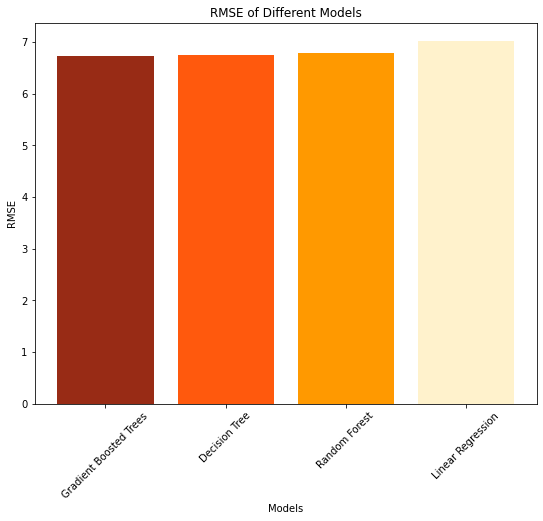

In [0]:
import matplotlib.pyplot as plt

# RMSE values
rmse_values_p = {'Linear Regression': lr_rmse_p,
               'Decision Tree': dtr_rmse_p,
               'Random Forest': rfr_rmse_p,
               'Gradient Boosted Trees': gbr_rmse_p}

# Sort the RMSE values in ascending order
sorted_rmse = sorted(rmse_values_p.items(), key=lambda x: x[1])

# Custom color palette
colors = ['#982b15ff', '#ff590d', '#ff9900', '#fff2ccff']

# Create a bar plot
fig, ax = plt.subplots(figsize=(9, 7))
ax.bar([x[0] for x in sorted_rmse], [x[1] for x in sorted_rmse], color=colors)

# Set plot labels and title
ax.set_ylabel('RMSE')
ax.set_xlabel('Models')
ax.set_title('RMSE of Different Models')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()


###Hyperparameters Tuning

In [0]:
# Perform random sampling
sampled_data = final_data.sample(withReplacement=False, fraction=0.00005, seed=6)

In [0]:
display(sampled_data)

features purchase_amount Map(vectorType -> sparse, length -> 17, indices -> List(0, 2, 5, 7, 10, 12, 14, 15, 16), values -> List(56.0, 1.0, 1.0, 1.0, 1.0, 3.04406735347078, 1.0, 11.0, 1.0)) 20.07 Map(vectorType -> sparse, length -> 17, indices -> List(0, 1, 5, 6, 7, 12, 15, 16), values -> List(40.0, 1.0, 1.0, 1.0, 1.0, 3.66428078489932, 13.0, 1.0)) 28.08 Map(vectorType -> sparse, length -> 17, indices -> List(0, 1, 7, 10, 12, 15, 16), values -> List(51.0, 1.0, 1.0, 1.0, 6.12951303846109, 6.0, 1.0)) 9.64 Map(vectorType -> sparse, length -> 17, indices -> List(0, 1, 5, 6, 9, 10, 12, 13, 15, 16), values -> List(48.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.1623939926669, 1.0, 18.0, 1.0)) 32.76 Map(vectorType -> sparse, length -> 17, indices -> List(0, 1, 5, 7, 10, 12, 14, 15, 16), values -> List(40.0, 1.0, 1.0, 1.0, 1.0, 2.42232570026048, 1.0, 17.0, 1.0)) 18.68 Map(vectorType -> sparse, length -> 17, indices -> List(0, 4, 5, 9, 10, 12, 14, 15, 16), values -> List(80.0, 1.0, 1.0, 1.0, 1.0, 4.74408492335216, 1.0, 8.0, 1.0)) 16.05 Map(vectorType -> sparse, length -> 17, indices -> List(0, 2, 5, 6, 8, 11, 12, 14, 15, 16), values -> List(61.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.953580754199624, 1.0, 22.0, 1.0)) 15.43 Map(vectorType -> sparse, length -> 17, indices -> List(0, 3, 9, 12, 13, 15, 16), values -> List(35.0, 1.0, 1.0, 4.35375330192116, 1.0, 13.0, 1.0)) 12.45 Map(vectorType -> sparse, length -> 17, indices -> List(0, 2, 8, 10, 12, 13, 15, 16), values -> List(62.0, 1.0, 1.0, 1.0, 4.6920218760137, 1.0, 18.0, 1.0)) 8.04 Map(vectorType -> sparse, length -> 17, indices -> List(0, 1, 9, 12, 13, 15, 16), values -> List(44.0, 1.0, 1.0, 3.28925734001405, 1.0, 22.0, 1.0)) 10.76 Map(vectorType -> sparse, length -> 17, indices -> List(0, 3, 5, 7, 10, 12, 14, 15, 16), values -> List(26.0, 1.0, 1.0, 1.0, 1.0, 2.13226770607349, 1.0, 12.0, 1.0)) 27.38 Map(vectorType -> sparse, length -> 17, indices -> List(0, 2, 7, 10, 12, 15), values -> List(69.0, 1.0, 1.0, 1.0, 3.45923725744047, 8.0)) 14.86 Map(vectorType -> sparse, length -> 17, indices -> List(0, 2, 5, 8, 10, 12, 15, 16), values -> List(58.0, 1.0, 1.0, 1.0, 1.0, 4.72873469514266, 23.0, 1.0)) 13.3 Map(vectorType -> sparse, length -> 17, indices -> List(0, 4, 5, 8, 12, 14, 15, 16), values -> List(72.0, 1.0, 1.0, 1.0, 5.09801017525465, 1.0, 16.0, 1.0)) 18.28 Map(vectorType -> sparse, length -> 17, indices -> List(0, 2, 5, 7, 10, 12, 14, 15, 16), values -> List(68.0, 1.0, 1.0, 1.0, 1.0, 3.44923269736646, 1.0, 7.0, 1.0)) 12.27 Map(vectorType -> sparse, length -> 17, indices -> List(0, 4, 5, 8, 10, 12, 13, 15, 16), values -> List(77.0, 1.0, 1.0, 1.0, 1.0, 1.94853505427432, 1.0, 17.0, 1.0)) 10.1 Map(vectorType -> sparse, length -> 17, indices -> List(0, 2, 8, 10, 12, 15, 16), values -> List(67.0, 1.0, 1.0, 1.0, 5.0053, 16.0, 1.0)) 10.28 Map(vectorType -> sparse, length -> 17, indices -> List(0, 4, 5, 8, 10, 12, 14, 15, 16), values -> List(75.0, 1.0, 1.0, 1.0, 1.0, 2.538227, 1.0, 19.0, 1.0)) 10.97 Map(vectorType -> sparse, length -> 17, indices -> List(0, 1, 5, 8, 11, 12, 13, 15, 16), values -> List(47.0, 1.0, 1.0, 1.0, 1.0, 5.743012, 1.0, 8.0, 1.0)) 17.92 Map(vectorType -> sparse, length -> 17, indices -> List(0, 2, 5, 8, 11, 12, 14, 15, 16), values -> List(61.0, 1.0, 1.0, 1.0, 1.0, 3.554657, 1.0, 18.0, 1.0)) 11.64 Map(vectorType -> sparse, length -> 17, indices -> List(0, 5, 6, 10, 12, 13, 15, 16), values -> List(18.0, 1.0, 1.0, 1.0, 2.100167, 1.0, 11.0, 1.0)) 22.88 Map(vectorType -> sparse, length -> 17, indices -> List(0, 3, 6, 10, 12, 14, 15), values -> List(33.0, 1.0, 1.0, 1.0, 5.393111, 1.0, 13.0)) 19.83 Map(vectorType -> sparse, length -> 17, indices -> List(0, 4, 8, 12, 15, 16), values -> List(73.0, 1.0, 1.0, 6.749041, 6.0, 1.0)) 10.41 Map(vectorType -> sparse, length -> 17, indices -> List(0, 2, 5, 6, 8, 10, 12, 14, 15, 16), values -> List(63.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.8224281, 1.0, 16.0, 1.0)) 19.17 Map(vectorType -> sparse, length -> 17, indices -> List(0, 5, 12, 13, 15), values -> List(20.0, 1.0, 5.8

In [0]:
sample_train, sample_test = sampled_data.randomSplit([0.8, 0.2], seed=6)

In [0]:
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator

# Hyperparameter tuning for Linear Regression

lr_Grid = ParamGridBuilder().addGrid(lin_reg.regParam, [0.01, 0.1]).addGrid(lin_reg.elasticNetParam, [0.0, 0.5, 1.0]).build()

lr_val = CrossValidator(estimator = lin_reg, estimatorParamMaps = lr_Grid, evaluator = evaluator, numFolds = 5)

lr_cv_model = lr_val.fit(sample_train)


# Best parameters for Linear Regression
print("Best Linear Regression Parameters:")
print("  - regParam:", lr_cv_model.bestModel._java_obj.getRegParam())
print("  - elasticNetParam:", lr_cv_model.bestModel._java_obj.getElasticNetParam())


Best Linear Regression Parameters:
  - regParam: 0.0
  - elasticNetParam: 0.0


In [0]:
# Hyperparameter tuning for Decision Tree Regressor

dtr_Grid = ParamGridBuilder() \
    .addGrid(dtr.maxDepth, [2, 5, 10]) \
    .addGrid(dtr.minInstancesPerNode, [1, 5, 10]) \
    .build()

dtr_val = CrossValidator(estimator=dtr,
                        estimatorParamMaps=dtr_Grid,
                        evaluator=evaluator,
                        numFolds=5)

dtr_cv_model =dtr_val.fit(sample_train)

print("\nBest Decision Tree Parameters:")
print("  - maxDepth:", dtr_cv_model.bestModel._java_obj.getMaxDepth())
print("  - minInstancesPerNode:", dtr_cv_model.bestModel._java_obj.getMinInstancesPerNode())


Best Decision Tree Parameters:
  - maxDepth: 2
  - minInstancesPerNode: 10


In [0]:
# Hyperparameter tuning for Random Forest Regressor

rfr = RandomForestRegressor(labelCol = 'purchase_amount', featuresCol = 'features')

rfr_Grid = ParamGridBuilder() \
    .addGrid(rfr.maxDepth, [2, 5, 10]) \
    .addGrid(rfr.numTrees, [10, 50, 100]) \
    .build()

rfr_val = CrossValidator(estimator=rfr,
                        estimatorParamMaps=paramGrid,
                        evaluator=evaluator,
                        numFolds=5)

rfr_cv_model = rfr_val.fit(sample_train)


# Best parameters for Random Forest Regressor
print("\nBest Random Forest Parameters:")
print("  - maxDepth:", rfr_cv_model.bestModel._java_obj.getMaxDepth())
print("  - numTrees:", rfr_cv_model.bestModel._java_obj.getNumTrees())


Best Random Forest Parameters:
  - maxDepth: 2
  - numTrees: 100


In [0]:
# Hyperparameter tuning for Gradient Boosted Trees Regressor
gbr = GBTRegressor(labelCol = 'purchase_amount', featuresCol = 'features')

gbr_Grid = ParamGridBuilder().addGrid(gbr.maxDepth, [2, 5]).addGrid(gbr.maxIter, [10, 50]).build()

gbr_val = CrossValidator(estimator=gbr,
                        estimatorParamMaps=gbr_Grid,
                        evaluator=evaluator,
                        numFolds=3)

gbr_cv_model = gbr_val.fit(sample_train)

# Best parameters for Gradient Boosted Trees Regressor
print("\nBest Gradient Boosted Trees Parameters:")
print("  - maxDepth:", gbr_cv_model.bestModel._java_obj.getMaxDepth())
print("  - maxIter:", gbr_cv_model.bestModel._java_obj.getMaxIter())


Best Gradient Boosted Trees Parameters:
  - maxDepth: 2
  - maxIter: 10


###Performance Comparison after Hyperparameters Tuning

In [0]:
# Evaluate models with tuned hyperparameters
lin_reg_cv_prediction = lr_cv_model.transform(test)
dtr_cv_prediction = dtr_cv_model.transform(test)
rfr_cv_prediction = rfr_cv_model.transform(test)
gbr_cv_prediction = gbr_cv_model.transform(test)

# Compute RMSE for each model's predictions
lin_reg_cv_rmse = evaluator.evaluate(lin_reg_cv_prediction)
dtr_cv_rmse = evaluator.evaluate(dtr_cv_prediction)
rfr_cv_rmse = evaluator.evaluate(rfr_cv_prediction)
gbr_cv_rmse = evaluator.evaluate(gbr_cv_prediction)

# Print the RMSE values
print("Linear Regression CV RMSE:", lin_reg_cv_rmse)
print("Decision Tree CV RMSE:", dtr_cv_rmse)
print("Random Forest CV RMSE:", rfr_cv_rmse)
print("Gradient Boosted Trees CV RMSE:", gbr_cv_rmse)

Linear Regression CV RMSE: 8.108045268595868
Decision Tree CV RMSE: 7.4987312483696975
Random Forest CV RMSE: 7.511033704974805
Gradient Boosted Trees CV RMSE: 7.687915247272237


###Feature Importance

In [0]:
# Get feature importances from the GBT model

gbr_feature_importances = gbr_model.featureImportances

# Convert the feature importances to a Python list
gbr_feature_importances_list = gbr_feature_importances.toArray().tolist()

# Print the feature importances
print("Gradient Boosted Trees Feature Importances:", gbr_feature_importances_list)


Gradient Boosted Trees Feature Importances: [0.2711683969696799, 4.796681925762374e-05, 0.00011389621079639993, 0.05885568352130418, 1.4664966592111332e-05, 0.0003866529779066104, 0.6632739047727725, 0.00024871574360090225, 0.00022468379905608567, 0.00018117447345251814, 0.00025019502867120515, 0.0002833129700432339, 0.002379853561057163, 0.0003658489594379916, 0.0002595116279951966, 0.001720156609293726, 0.00022538098908241776]


In [0]:
best_gbr = gbr_cv_model.bestModel

# Get feature importances
feature_importances = best_dtr.featureImportances

In [0]:
features_names =  ["age", "income_50_70", "income_75_100", "income_25_50", "income_over100", "sex_F", "rewards_false", "occupation_employed", 
             "occupation_retired", "occupation_self_employed", "purchase_credit", "purchase_mobile", "wait_time", "location_downtown",
             "location_midtown", "transaction_time", "daytype_weekdays"]

# Display feature importances
for feature, importance in zip(features_names, gbr_feature_importances_list):
    print(f"{feature}: {importance}")

age: 0.2711683969696799
income_50_70: 4.796681925762374e-05
income_75_100: 0.00011389621079639993
income_25_50: 0.05885568352130418
income_over100: 1.4664966592111332e-05
sex_F: 0.0003866529779066104
rewards_false: 0.6632739047727725
occupation_employed: 0.00024871574360090225
occupation_retired: 0.00022468379905608567
occupation_self_employed: 0.00018117447345251814
purchase_credit: 0.00025019502867120515
purchase_mobile: 0.0002833129700432339
wait_time: 0.002379853561057163
location_downtown: 0.0003658489594379916
location_midtown: 0.0002595116279951966
transaction_time: 0.001720156609293726
daytype_weekdays: 0.00022538098908241776


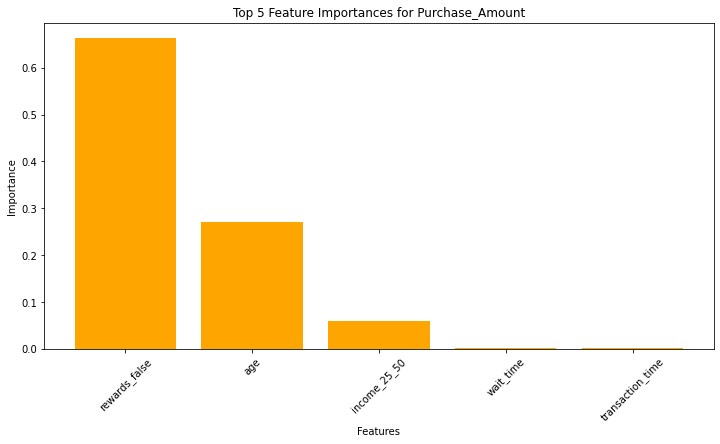

In [0]:
features_names = ["age", "income_50_70", "income_75_100", "income_25_50", "income_over100", "sex_F", "rewards_false", "occupation_employed",
             "occupation_retired", "occupation_self_employed", "purchase_credit", "purchase_mobile", "wait_time", "location_downtown",
             "location_midtown", "transaction_time", "daytype_weekdays"]

# Combine feature names and importances, and sort by descending importance
combined_features = sorted(zip(features_names, gbr_feature_importances_list), key=lambda x: x[1], reverse=True)

# Get top 10 features
top_5_features = combined_features[:5]

# Separate names and importances for top 10 features
top_5_names, top_5_importances = zip(*top_5_features)

# Plot the top 10 feature importances
plt.figure(figsize=(12, 6))
plt.bar(top_5_names, top_5_importances, color='orange')
plt.title('Top 5 Feature Importances for Purchase_Amount')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation=45)
plt.show()

In [0]:
print(combined_features)

[('occupation_employed', 0.47265538301115617), ('daytype_weekdays', 0.25880851700681723), ('purchase_amount', 0.0815302272193836), ('transaction_time', 0.06182169540219181), ('location_downtown', 0.05911939189686005), ('location_midtown', 0.016890383313421936), ('age', 0.00013179282135831634), ('purchase_mobile', 0.00012385890583024381), ('income_50_70', 2.4511985870663097e-05), ('sex_F', 1.8063587690520312e-05), ('occupation_retired', 1.2574550905305973e-05), ('purchase_credit', 7.076939185672158e-06), ('income_75_100', 6.629714336658861e-06), ('occupation_self_employed', 2.843183478287966e-06), ('income_25_50', 0.0), ('income_over100', 0.0)]


##Modeling - Target "wait_time"

In [0]:
display(df)

age income sex rewards_member occupation num_items purchase_method wait_time purchase_amount store_location transaction_time day_of_week daytype 48 $50K-$75K Female false Retired 3 Credit Card 4.37041779796359 15.19 Uptown 22 Saturday Weekend 32 $25K-$50K Female false Retired 3 Cash 2.30796121678142 12.41 Midtown 20 Friday Weekday 68 $75K-$100K Female false Self Employed 4 Mobile Payment 3.89939822873409 18.16 Midtown 12 Friday Weekday 31 $25K-$50K Female false Employed 4 Mobile Payment 1.87190761759261 15.41 Downtown 14 Sunday Weekend 20 Under $25K Female false Student 1 Credit Card 2.66648236799237 6.23 Uptown 18 Wednesday Weekday 59 $75K-$100K Female true Employed 5 Credit Card 2.50637046034456 21.72 Midtown 13 Monday Weekday 67 $75K-$100K Male true Self Employed 3 Credit Card 0.966888079743862 13.08 Uptown 12 Saturday Weekend 71 Over $100K Female false Retired 3 Credit Card 3.42676111896725 14.96 Downtown 13 Saturday Weekend 60 $75K-$100K Male true Retired 6 Credit Card 2.94511204259134 19.27 Downtown 11 Wednesday Weekday 54 $75K-$100K Male true Employed 3 Credit Card 0.853794802025569 13.38 Midtown 16 Friday Weekday 69 $75K-$100K Female false Retired 1 Credit Card 1.84201939727228 7.77 Midtown 20 Thursday Weekday 31 $25K-$50K Male false Employed 2 Credit Card 2.83113616743937 9.4 Downtown 17 Monday Weekday 71 Over $100K Male true Self Employed 7 Credit Card 2.32169891835435 30.33 Downtown 12 Friday Weekday 42 $50K-$75K Male false Employed 5 Credit Card 5.3640250495533 20.03 Downtown 14 Monday Weekday 43 $50K-$75K Female false Self Employed 1 Credit Card 3.01170260829887 9.19 Uptown 22 Monday Weekday 44 $50K-$75K Male false Retired 2 Credit Card 4.84513397047885 13.3 Downtown 8 Tuesday Weekday 22 $25K-$50K Female false Student 3 Credit Card 4.62054880196501 21.54 Downtown 10 Monday Weekday 68 $75K-$100K Female false Retired 5 Credit Card 4.74261880785731 22.83 Uptown 8 Thursday Weekday 44 $50K-$75K Female false Employed 4 Credit Card 3.29372136956535 18.84 Downtown 17 Friday Weekday 74 Over $100K Male false Self Employed 5 Credit Card 2.77240479186736 22.61 Downtown 8 Friday Weekday 45 $50K-$75K Female false Retired 2 Credit Card 4.69463475082443 18.01 Downtown 6 Tuesday Weekday 74 Over $100K Female false Retired 4 Mobile Payment 6.15106904848735 15.99 Downtown 8 Sunday Weekend 26 $25K-$50K Female false Employed 2 Cash 6.33840504867014 22.62 Midtown 19 Saturday Weekend 46 $50K-$75K Female false Employed 3 Credit Card 5.17515369794507 18.02 Uptown 8 Thursday Weekday 52 $50K-$75K Female false Employed 3 Credit Card 5.38652417133762 13.63 Downtown 7 Thursday Weekday 25 $25K-$50K Male false Employed 1 Credit Card 5.4180536035003 7.24 Downtown 11 Friday Weekday 43 $50K-$75K Female true Self Employed 4 Credit Card 1.66157707924053 18.69 Downtown 19 Monday Weekday 24 $25K-$50K Male false Employed 2 Mobile Payment 3.85947247246503 17.59 Downtown 9 Monday Weekday 59 $75K-$100K Female false Self Employed 1 Credit Card 5.2658759429863 9.18 Uptown 18 Friday Weekday 26 $25K-$50K Female true Employed 3 Credit Card 0.895759219737766 20.14 Midtown 21 Saturday Weekend 79 Over $100K Male true Employed 4 Credit Card 1.70963406663821 17.28 Downtown 16 Wednesday Weekday 36 $25K-$50K Female false Employed 3 Credit Card 3.23468531239395 18.41 Uptown 15 Monday Weekday 53 $50K-$75K Female true Self Employed 6 Credit Card 0.475965322635555 26.5 Midtown 16 Tuesday Weekday 31 $25K-$50K Female false Employed 1 Credit Card 2.44373690362319 7.2 Midtown 19 Tuesday Weekday 34 $25K-$50K Female false Self Employed 3 Credit Card 4.27313828105725 17.26 Uptown 12 Friday Weekday 60 $75K-$100K Female false Employed 4 Credit Card 2.6906275908758 17.45 Downtown 19 Friday Weekday 56 $75K-$100K Male false Employed 4 Credit Card 1.21350564075743 20.56 Uptown 19 Tuesday Weekday 70 Over $100K Male false Self Employed 4 Credit Card 5.24963338886363 14.64 Midtown 12 Wednesday Weekday 29 $25K-$50K Male false Self Employed 2 Credit Card 3.68571205588007 6.19 Uptown 7 Sunda

###Pipeline

In [0]:
assembler = VectorAssembler(inputCols = ['age', 
                                         'IncomeVector', 
                                         'SexVector', 
                                         'rewards_member',
                                         "OccupationVector",
                                         "num_items",
                                         'PurchaseVector',
                                         'LocationVector',
                                         'transaction_time',
                                         'DayTypeVector'], outputCol = 'features')

pipeline = Pipeline(stages = [income_indexer, income_encoder, 
                              gender_indexer, gender_encoder,
                              occupation_indexer, occupation_encoder, 
                              purchase_method_indexer, purchase_method_encoder,
                              location_indexer, location_encoder,
                              day_type_indexer, day_type_encoder,
                              assembler])

In [0]:
output = pipeline.fit(df).transform(df)

###Train-Test Split

In [0]:
final_data = output.select("features", "wait_time")

In [0]:
train, test = final_data.randomSplit([0.8, 0.2], seed=6)

###Linear Regression

In [0]:
lin_reg = LinearRegression(labelCol = "wait_time")
lr_model = lin_reg.fit(train)

### Tree-Based Models

In [0]:
dtr = DecisionTreeRegressor(labelCol = 'wait_time', featuresCol = 'features')
rfr = RandomForestRegressor(labelCol = 'wait_time', featuresCol = 'features')
gbr = GBTRegressor(labelCol = 'wait_time', featuresCol = 'features')

In [0]:
dtr_model = dtr.fit(train)
rfr_model = rfr.fit(train)
gbr_model = gbr.fit(train)

In [0]:
lr_prediction = lr_model.transform(test)
dtr_prediction = dtr_model.transform(test)
rfr_prediction = rfr_model.transform(test)
gbr_prediction = gbr_model.transform(test)

In [0]:
evaluator = RegressionEvaluator(labelCol='wait_time', predictionCol='prediction', metricName='rmse')

# Compute RMSE for each model's predictions
lr_rmse = evaluator.evaluate(lr_prediction)
dtr_rmse = evaluator.evaluate(dtr_prediction)
rfr_rmse = evaluator.evaluate(rfr_prediction)
gbr_rmse = evaluator.evaluate(gbr_prediction)

# Print the RMSE values
print("Linear Regression RMSE:", lr_rmse)
print("Decision Tree RMSE:", dtr_rmse)
print("Random Forest RMSE:", rfr_rmse)
print("Gradient Boosted Trees RMSE:", gbr_rmse)

Linear Regression RMSE: 1.3455486983055036
Decision Tree RMSE: 1.2823989206966382
Random Forest RMSE: 1.3309431057413297
Gradient Boosted Trees RMSE: 1.2491071554087194


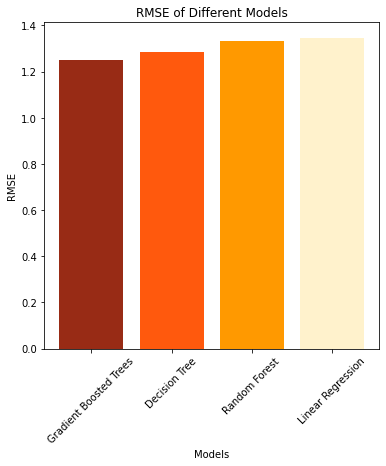

In [0]:
# RMSE values
rmse_values = {'Linear Regression': lr_rmse,
               'Decision Tree': dtr_rmse,
               'Random Forest': rfr_rmse,
               'Gradient Boosted Trees': gbr_rmse}

# Sort the RMSE values in ascending order
sorted_rmse = sorted(rmse_values.items(), key=lambda x: x[1])

# Custom color palette
colors = ['#982b15ff', '#ff590d', '#ff9900', '#fff2ccff']

# Create a bar plot
fig, ax = plt.subplots(figsize=(6, 6))
ax.bar([x[0] for x in sorted_rmse], [x[1] for x in sorted_rmse], color=colors)

# Set plot labels and title
ax.set_ylabel('RMSE')
ax.set_xlabel('Models')
ax.set_title('RMSE of Different Models')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()

###Hyperparameters Tuning

In [0]:
# Perform random sampling
sampled_data = final_data.sample(withReplacement=False, fraction=0.00005, seed=6)
sample_train, sample_test = sampled_data.randomSplit([0.8, 0.2], seed=6)

In [0]:
# Hyperparameter tuning for Linear Regression

lr_Grid = ParamGridBuilder().addGrid(lin_reg.regParam, [0.01, 0.1]).addGrid(lin_reg.elasticNetParam, [0.0, 0.5, 1.0]).build()

lr_val = CrossValidator(estimator = lin_reg, estimatorParamMaps = lr_Grid, evaluator = evaluator, numFolds = 5)

lr_cv_model = lr_val.fit(sample_train)


# Best parameters for Linear Regression
print("Best Linear Regression Parameters:")
print("  - regParam:", lr_cv_model.bestModel._java_obj.getRegParam())
print("  - elasticNetParam:", lr_cv_model.bestModel._java_obj.getElasticNetParam())

Best Linear Regression Parameters:
  - regParam: 0.1
  - elasticNetParam: 0.0


In [0]:
# Hyperparameter tuning for Decision Tree Regressor

dtr_Grid = ParamGridBuilder() \
    .addGrid(dtr.maxDepth, [2, 10]) \
    .addGrid(dtr.minInstancesPerNode, [1, 5, 10]) \
    .build()

dtr_val = CrossValidator(estimator=dtr,
                        estimatorParamMaps=dtr_Grid,
                        evaluator=evaluator,
                        numFolds=5)

dtr_cv_model = dtr_val.fit(sample_train)

print("\nBest Decision Tree Parameters:")
print("  - maxDepth:", dtr_cv_model.bestModel._java_obj.getMaxDepth())
print("  - minInstancesPerNode:", dtr_cv_model.bestModel._java_obj.getMinInstancesPerNode())


Best Decision Tree Parameters:
  - maxDepth: 2
  - minInstancesPerNode: 5


In [0]:
# Hyperparameter tuning for Random Forest Regressor

rfr = RandomForestRegressor(labelCol = 'wait_time', featuresCol = 'features')

rfr_Grid = ParamGridBuilder() \
    .addGrid(rfr.maxDepth, [2, 10]) \
    .addGrid(rfr.numTrees, [10, 50, 100]) \
    .build()

rfr_val = CrossValidator(estimator=rfr,
                        estimatorParamMaps=paramGrid,
                        evaluator=evaluator,
                        numFolds=5)

rfr_cv_model = rfr_val.fit(sample_train)


# Best parameters for Random Forest Regressor
print("\nBest Random Forest Parameters:")
print("  - maxDepth:", rfr_cv_model.bestModel._java_obj.getMaxDepth())
print("  - numTrees:", rfr_cv_model.bestModel._java_obj.getNumTrees())


Best Random Forest Parameters:
  - maxDepth: 5
  - numTrees: 20


In [0]:
# Hyperparameter tuning for Gradient Boosted Trees Regressor

gbr_Grid = ParamGridBuilder().addGrid(gbr.maxDepth, [2, 5]).addGrid(gbr.maxIter, [10, 50]).build()

gbr_val = CrossValidator(estimator=gbr,
                        estimatorParamMaps=gbr_Grid,
                        evaluator=evaluator,
                        numFolds=3)

gbr_cv_model = gbr_val.fit(sample_train)

# Best parameters for Gradient Boosted Trees Regressor
print("\nBest Gradient Boosted Trees Parameters:")
print("  - maxDepth:", gbr_cv_model.bestModel._java_obj.getMaxDepth())
print("  - maxIter:", gbr_cv_model.bestModel._java_obj.getMaxIter())


Best Gradient Boosted Trees Parameters:
  - maxDepth: 2
  - maxIter: 10


###Performance Comparison after Hyperparameters Tuning

In [0]:
# Evaluate models with tuned hyperparameters
lin_reg_cv_prediction = lr_cv_model.transform(test)
dtr_cv_prediction = dtr_cv_model.transform(test)
rfr_cv_prediction = rfr_cv_model.transform(test)
gbr_cv_prediction = gbr_cv_model.transform(test)

# Compute RMSE for each model's predictions
lin_reg_cv_rmse = evaluator.evaluate(lin_reg_cv_prediction)
dtr_cv_rmse = evaluator.evaluate(dtr_cv_prediction)
rfr_cv_rmse = evaluator.evaluate(rfr_cv_prediction)
gbr_cv_rmse = evaluator.evaluate(gbr_cv_prediction)

# Print the RMSE values
print("Linear Regression CV RMSE:", lin_reg_cv_rmse)
print("Decision Tree CV RMSE:", dtr_cv_rmse)
print("Random Forest CV RMSE:", rfr_cv_rmse)
print("Gradient Boosted Trees CV RMSE:", gbr_cv_rmse)

Linear Regression CV RMSE: 1.442778924951777
Decision Tree CV RMSE: 1.46388525564914
Random Forest CV RMSE: 1.509143329190013
Gradient Boosted Trees CV RMSE: 1.4502913738183356


For two modeling parts, the performance after hyperparameter tuning gets worse, it could because we use a very small sample to tune the hyperparameter, so when it fit bigger data, the parameter make performance worse

###Feature Importance

In [0]:
# Get feature importances from the GBT model
gbr_feature_importances = gbr_model.featureImportances

# Convert the feature importances to a Python list
gbr_feature_importances_list = gbr_feature_importances.toArray().tolist()

# Print the feature importances
print("Gradient Boosted Trees Feature Importances:", gbr_feature_importances_list)

Gradient Boosted Trees Feature Importances: [0.00013179282135831634, 2.4511985870663097e-05, 6.629714336658861e-06, 0.0, 0.0, 1.8063587690520312e-05, 0.47265538301115617, 1.2574550905305973e-05, 2.843183478287966e-06, 7.076939185672158e-06, 0.00012385890583024381, 0.0815302272193836, 0.05911939189686005, 0.016890383313421936, 0.06182169540219181, 0.25880851700681723, 0.04884705046151355]


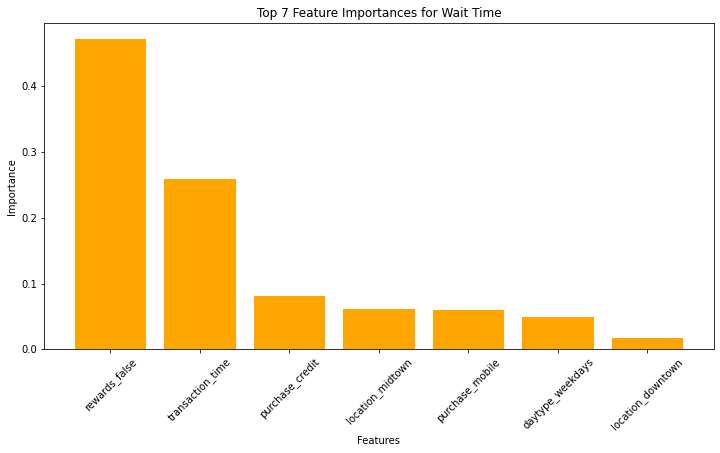

In [0]:
features_names = ["age", "income_50_70", "income_75_100", "income_25_50", "income_over100", "sex_F", "rewards_false", "occupation_employed",
             "occupation_retired", "occupation_self_employed", "num_items", "purchase_credit", "purchase_mobile", "location_downtown",
             "location_midtown", "transaction_time", "daytype_weekdays"]

# Combine feature names and importances, and sort by descending importance
combined_features = sorted(zip(features_names, gbr_feature_importances_list), key=lambda x: x[1], reverse=True)

# Get top 8 features
top_7_features = combined_features[:7]

# Separate names and importances for top 7 features
top_7_names, top_7_importances = zip(*top_7_features)

# Plot the top 7 feature importances
plt.figure(figsize=(12, 6))
plt.bar(top_7_names, top_7_importances, color='orange')
plt.title('Top 7 Feature Importances for Wait Time')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation=45)
plt.show()

In [0]:
print(combined_features)

[('rewards_false', 0.47265538301115617), ('transaction_time', 0.25880851700681723), ('purchase_credit', 0.0815302272193836), ('location_midtown', 0.06182169540219181), ('purchase_mobile', 0.05911939189686005), ('daytype_weekdays', 0.04884705046151355), ('location_downtown', 0.016890383313421936), ('age', 0.00013179282135831634), ('num_items', 0.00012385890583024381), ('income_50_70', 2.4511985870663097e-05), ('sex_F', 1.8063587690520312e-05), ('occupation_employed', 1.2574550905305973e-05), ('occupation_self_employed', 7.076939185672158e-06), ('income_75_100', 6.629714336658861e-06), ('occupation_retired', 2.843183478287966e-06), ('income_25_50', 0.0), ('income_over100', 0.0)]


##Modeling - Target "Rewards_Member"

###Pipeline

In [0]:
assembler = VectorAssembler(inputCols = ['age', 
                                         'IncomeVector', 
                                         'SexVector', 
                                         "OccupationVector",
                                         'PurchaseVector',
                                         'wait_time',
                                         "purchase_amount",
                                         'LocationVector',
                                         'transaction_time',
                                         'DayTypeVector'], outputCol = 'features')

pipeline = Pipeline(stages = [income_indexer, income_encoder, 
                              gender_indexer, gender_encoder,
                              occupation_indexer, occupation_encoder, 
                              purchase_method_indexer, purchase_method_encoder,
                              location_indexer, location_encoder,
                              day_type_indexer, day_type_encoder,
                              assembler])

In [0]:
output = pipeline.fit(df).transform(df)

###Train-Test Split

In [0]:
final_data = output.select("features", "RewardsIndex")
train, test = final_data.randomSplit([0.8, 0.2], seed=6)

###Logistic Regression

In [0]:
from pyspark.ml.classification import LogisticRegression

In [0]:
log_reg = LogisticRegression(featuresCol = 'features', labelCol = 'RewardsIndex')
log_model = log_reg.fit(train)

###Tree-Based Models

In [0]:
from pyspark.ml.classification import DecisionTreeClassifier, GBTClassifier, RandomForestClassifier

In [0]:
dtc = DecisionTreeClassifier(labelCol= 'RewardsIndex', featuresCol= 'features')
rfc = RandomForestClassifier(labelCol= 'RewardsIndex', featuresCol= 'features')
gbc = GBTClassifier(labelCol= 'RewardsIndex', featuresCol= 'features')

In [0]:
dtc_model = dtc.fit(train)
rfc_model = rfc.fit(train)
gbc_model = gbc.fit(train)

###Baseline Model Performance Comparison

In [0]:
log_prediction = log_model.transform(test)
dtc_prediction = dtc_model.transform(test)
rfc_prediction = rfc_model.transform(test)
gbc_prediction = gbc_model.transform(test)

In [0]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator
evaluator = BinaryClassificationEvaluator(labelCol='RewardsIndex', rawPredictionCol='rawPrediction', metricName='areaUnderROC')

# Compute AUC for each model's predictions
log_auc = evaluator.evaluate(log_prediction)
dtc_auc = evaluator.evaluate(dtc_prediction)
rfc_auc = evaluator.evaluate(rfc_prediction)
gbc_auc = evaluator.evaluate(gbc_prediction)

# Print the AUC values
print("Logistic Regression AUC:", log_auc)
print("Decision Tree AUC:", dtc_auc)
print("Random Forest AUC:", rfc_auc)
print("Gradient Boosted Trees AUC:", gbc_auc)

Logistic Regression AUC: 0.9431510744749144
Decision Tree AUC: 0.8643471092999437
Random Forest AUC: 0.9338423106911389
Gradient Boosted Trees AUC: 0.9629338054429695


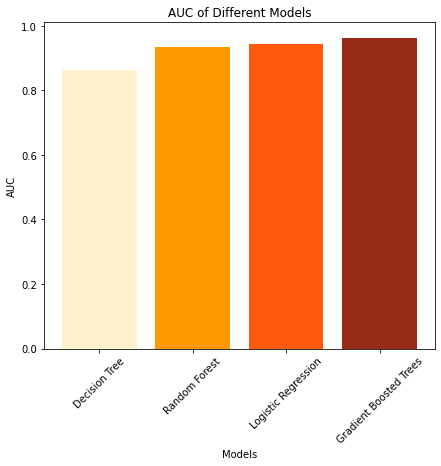

In [0]:
# AUC values
auc_values = {'Logistic Regression': log_auc,
               'Decision Tree': dtc_auc,
               'Random Forest': rfc_auc,
               'Gradient Boosted Trees': gbc_auc}

# Sort the AUC values in ascending order
sorted_auc = sorted(auc_values.items(), key=lambda x: x[1])

# Custom color palette
colors = ['#fff2ccff', '#ff9900', '#ff590d', '#982b15ff']

# Create a bar plot
fig, ax = plt.subplots(figsize=(7, 6))
ax.bar([x[0] for x in sorted_auc], [x[1] for x in sorted_auc], color=colors)

# Set plot labels and title
ax.set_ylabel('AUC')
ax.set_xlabel('Models')
ax.set_title('AUC of Different Models')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()


###Feature Importance

In [0]:
# Get feature importances from the GBT model
gbc_feature_importances = gbc_model.featureImportances

# Convert the feature importances to a Python list
gbc_feature_importances_list = gbc_feature_importances.toArray().tolist()

# Print the feature importances
print("Gradient Boosted Trees Feature Importances:", gbc_feature_importances_list)

Gradient Boosted Trees Feature Importances: [0.030725429088264967, 0.0, 0.0, 0.01664554454758186, 0.0, 0.0, 0.0, 0.0, 0.0, 0.06408851429199416, 0.04674267650906307, 0.5127708610376767, 0.14443385248134802, 0.004002712714745317, 0.03163703029219405, 0.10945285879321433, 0.039500520243917564]


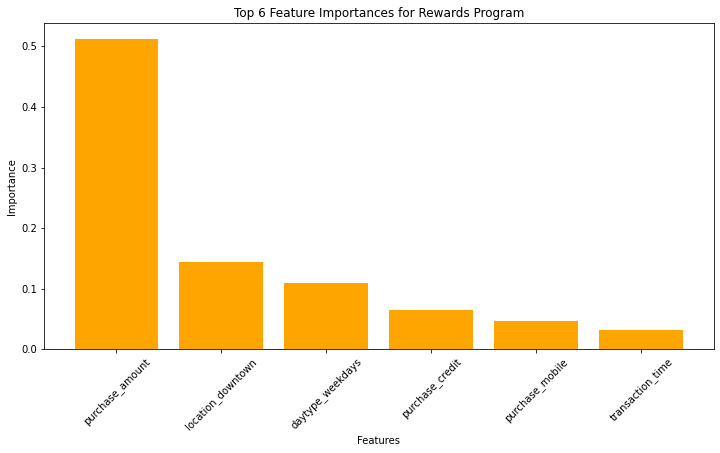

In [0]:
features_names = ["age", "income_50_70", "income_75_100", "income_25_50", "income_over100", "sex_F", "occupation_employed",
             "occupation_retired", "occupation_self_employed", "purchase_credit", "purchase_mobile", "purchase_amount", "location_downtown",
             "location_midtown", "transaction_time", "daytype_weekdays"]

# Combine feature names and importances, and sort by descending importance
combined_features = sorted(zip(features_names, gbc_feature_importances_list), key=lambda x: x[1], reverse=True)

# Get top 6 features
top_6_features = combined_features[:6]

# Separate names and importances for top 6 features
top_6_names, top_6_importances = zip(*top_6_features)

# Plot the top 6 feature importances
plt.figure(figsize=(12, 6))
plt.bar(top_6_names, top_6_importances, color='orange')
plt.title('Top 6 Feature Importances for Rewards Program')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation=45)
plt.show()

In [0]:
print(combined_features)

[('purchase_amount', 0.5127708610376767), ('location_downtown', 0.14443385248134802), ('daytype_weekdays', 0.10945285879321433), ('purchase_credit', 0.06408851429199416), ('purchase_mobile', 0.04674267650906307), ('transaction_time', 0.03163703029219405), ('age', 0.030725429088264967), ('income_25_50', 0.01664554454758186), ('location_midtown', 0.004002712714745317), ('income_50_70', 0.0), ('income_75_100', 0.0), ('income_over100', 0.0), ('sex_F', 0.0), ('occupation_employed', 0.0), ('occupation_retired', 0.0), ('occupation_self_employed', 0.0)]
